In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# Step 2: Load the Census Income dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]
df = pd.read_csv(url, names=columns, sep=',\s', na_values=["?"], engine='python')



In [3]:
df

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[32561 rows x 15 columns]

In [4]:
df["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [5]:
df["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [6]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [7]:
df=df.replace("?",np.nan)

In [8]:
df

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[32561 rows x 15 columns]

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

23

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[30139 rows x 15 columns]

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [26]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

In [27]:
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=le.fit_transform(df[col])

In [20]:
df

age  workclass  fnlwgt  education  education-num  marital-status  \
0       39          5   77516          9             13               4   
1       50          4   83311          9             13               2   
2       38          2  215646         11              9               0   
3       53          2  234721          1              7               2   
4       28          2  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          2  257302          7             12               2   
32557   40          2  154374         11              9               2   
32558   58          2  151910         11              9               6   
32559   22          2  201490         11              9               4   
32560   52          3  287927         11              9               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0             1     4    1          2174             0   
1               3             0     4    1             0             0   
2               5             1     4    1             0             0   
3               5             0     2    1             0             0   
4               9             5     2    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32556          12             5     4    0             0             0   
32557           6             0     4    1             0             0   
32558           0             4     4    0             0             0   
32559           0             3     4    1             0             0   
32560           3             5     4    0         15024             0   

       hours-per-week  native-country  income  
0                  40              38       0  
1                  13              38       0  
2                  40              38       0  
3                  40              38       0  
4                  40               4       0  
...               ...             ...     ...  
32556              38              38       0  
32557              40              38       1  
32558              40              38       0  
32559              20              38       0  
32560              40              38       1  

[30139 rows x 15 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int64
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int64
 4   education-num   30139 non-null  int64
 5   marital-status  30139 non-null  int64
 6   occupation      30139 non-null  int64
 7   relationship    30139 non-null  int64
 8   race            30139 non-null  int64
 9   sex             30139 non-null  int64
 10  capital-gain    30139 non-null  int64
 11  capital-loss    30139 non-null  int64
 12  hours-per-week  30139 non-null  int64
 13  native-country  30139 non-null  int64
 14  income          30139 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


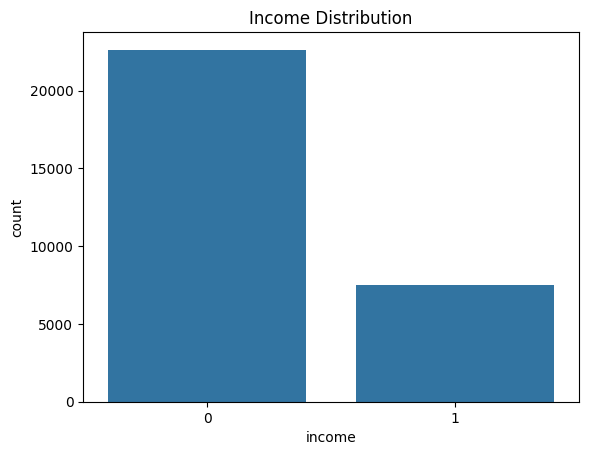

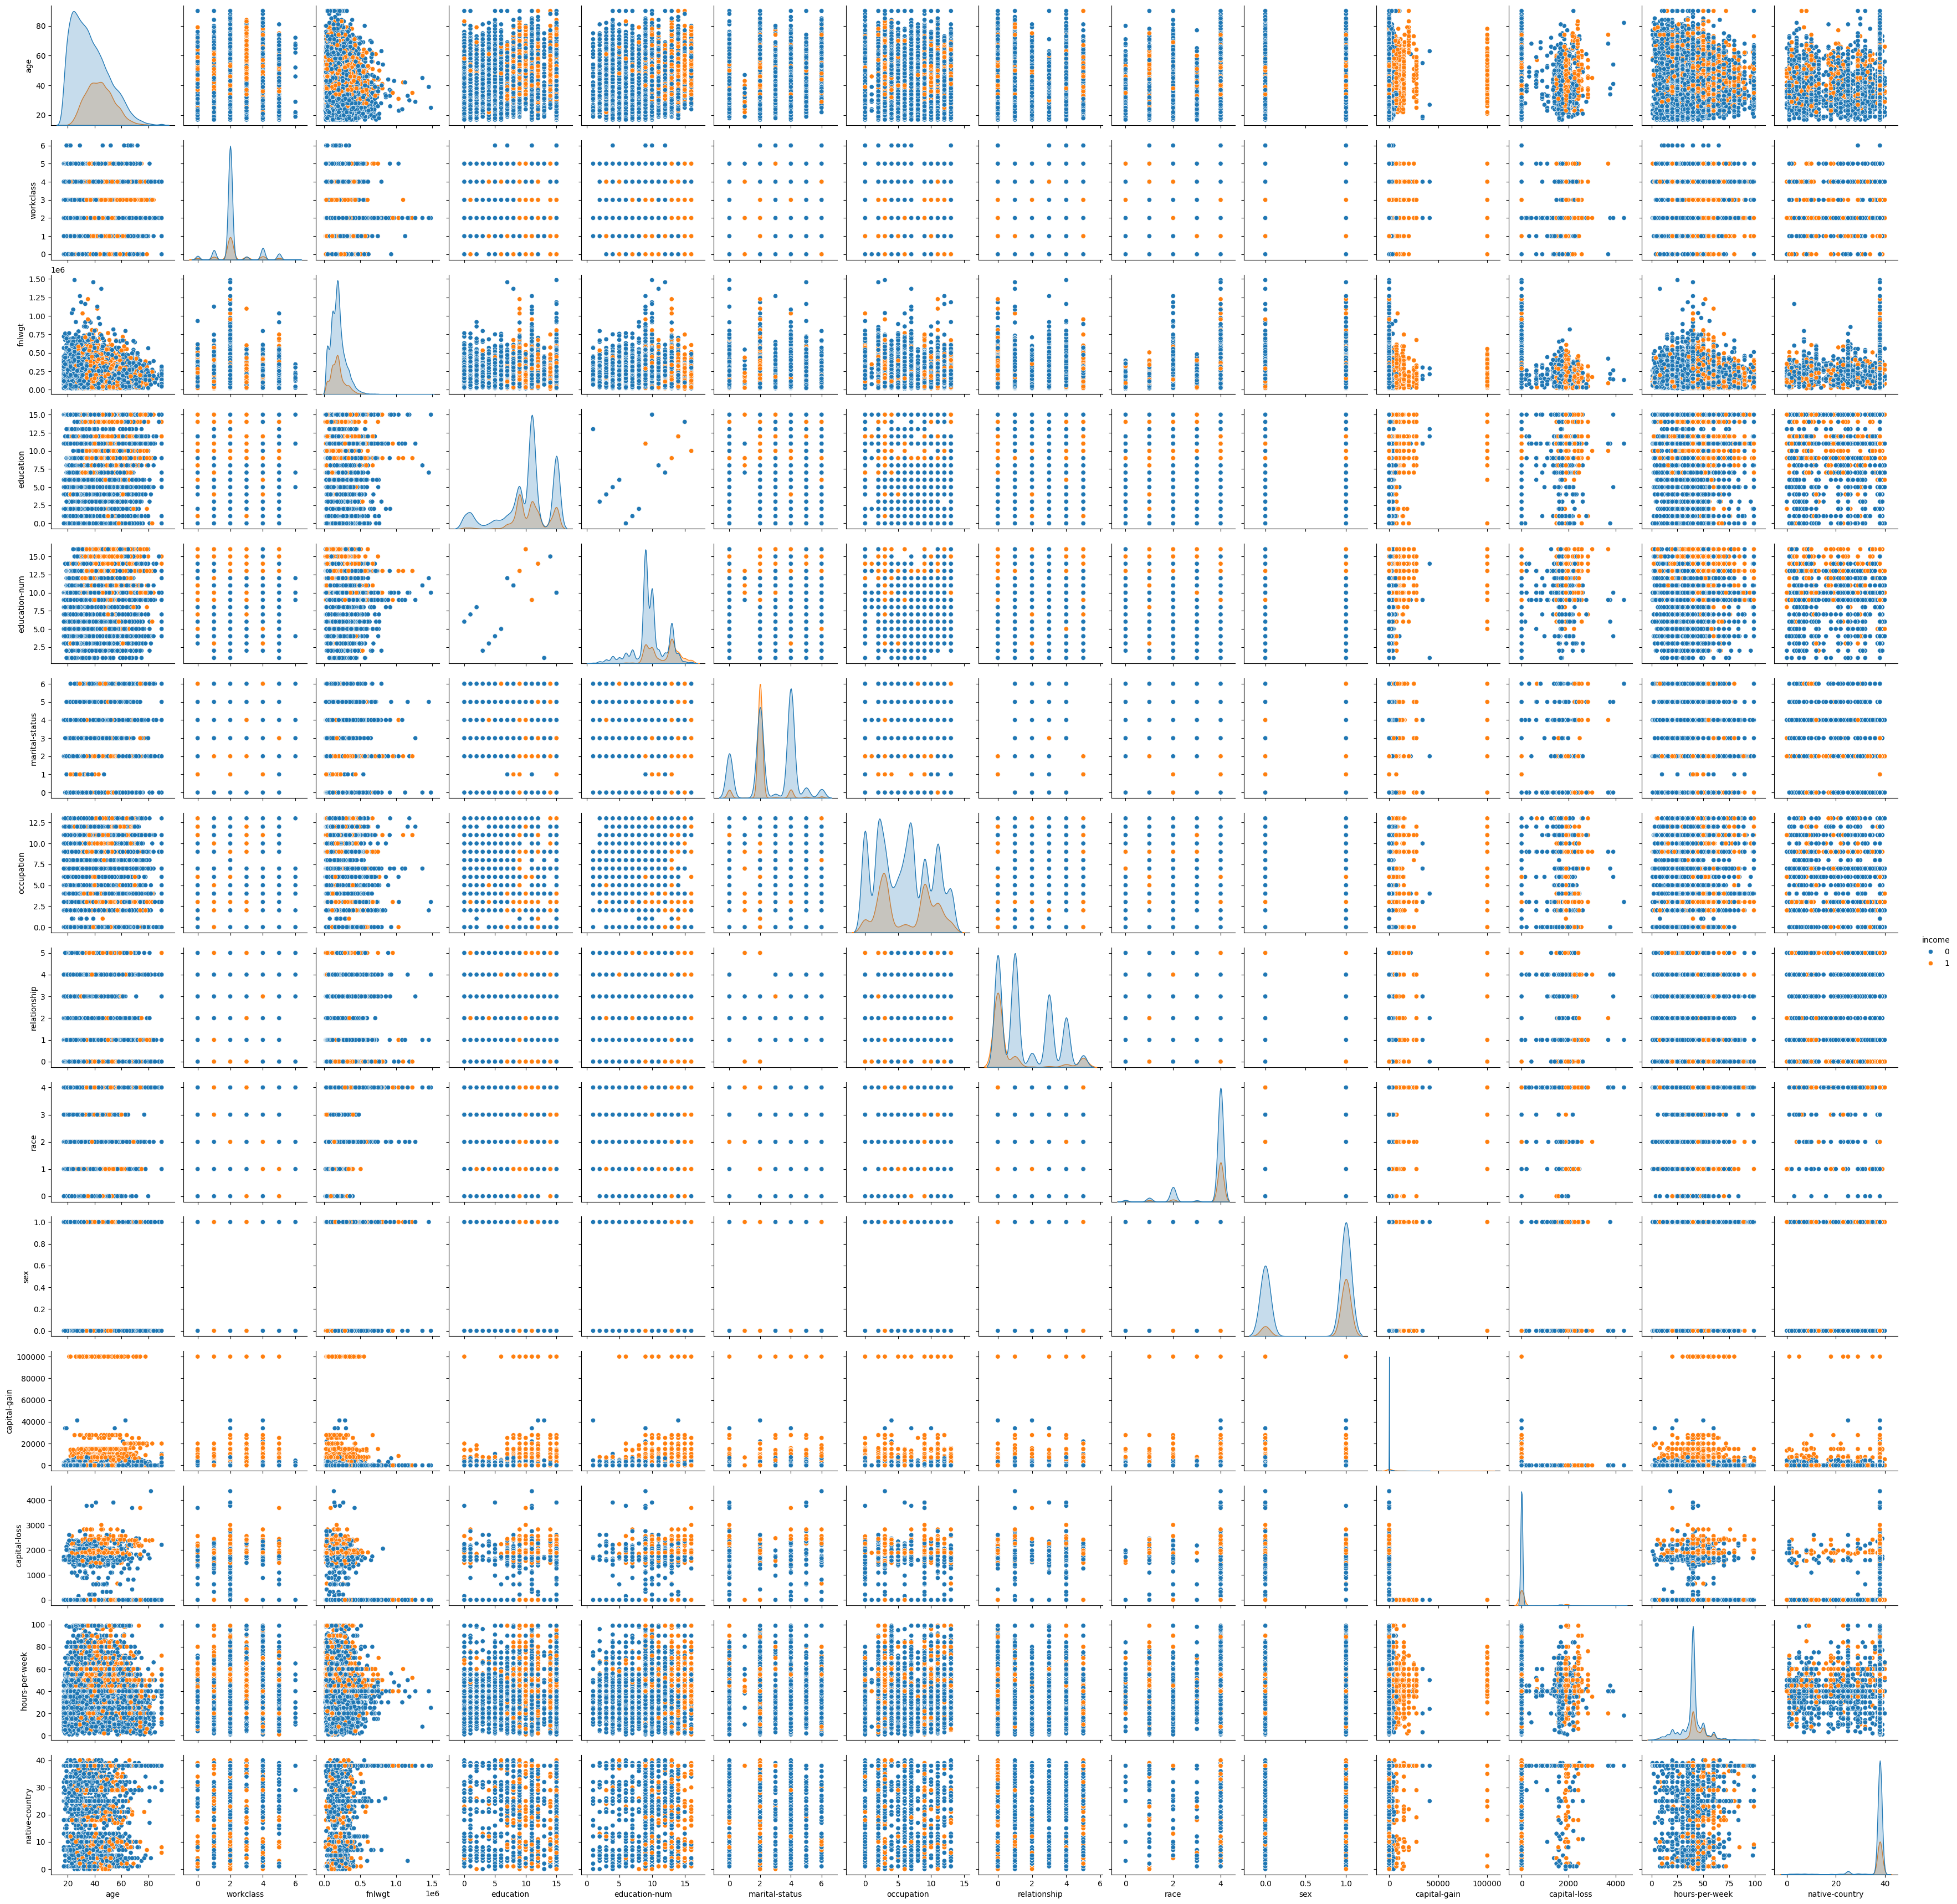

In [23]:
# Perform Exploratory Data Analysis (EDA)
sns.countplot(x='income', data=df)
plt.title("Income Distribution")
plt.show()
sns.pairplot(df, hue="income")
plt.show()


In [24]:
# Additional EDA as per your analysis needs...

# Step 4: Preprocess the data
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], drop_first=True)
X = df.drop("income", axis=1)
y = df["income"]


In [25]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
trees=[i for i in range(50,800,50)]
trees


[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750]

In [28]:
# Step 6: Standardize the features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)
logreg_model.fit(X_train_scaled, y_train)
logreg_predictions = logreg_model.predict(X_test_scaled)


In [34]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)

In [35]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

In [36]:
# Step 8: Evaluate the models after standardization
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [37]:
print("Logistic Regression Accuracy (after standardization):", logreg_accuracy)
print("Decision Tree Accuracy (after standardization):", dt_accuracy)
print("Random Forest Accuracy (after standardization):", rf_accuracy)

Logistic Regression Accuracy (after standardization): 0.8505308560053085
Decision Tree Accuracy (after standardization): 0.814366290643663
Random Forest Accuracy (after standardization): 0.856171201061712


In [38]:
trees=[i for i in range(50,800,50)]
trees
for N in trees:
    rf_model=RandomForestClassifier(n_estimators=N,random_state=56)
    rf_model.fit(X_train,y_train)
    rf_pred=rf_model.predict(X_test)
    acc=accuracy_score(y_test,rf_pred)
    print("Random Forest with",N," number of Trees having accuracy",acc )

Random Forest with 50  number of Trees having accuracy 0.8586595885865959
Random Forest with 100  number of Trees having accuracy 0.856171201061712
Random Forest with 150  number of Trees having accuracy 0.8578301260783012
Random Forest with 200  number of Trees having accuracy 0.8573324485733245
Random Forest with 250  number of Trees having accuracy 0.8571665560716656
Random Forest with 300  number of Trees having accuracy 0.8570006635700066
Random Forest with 350  number of Trees having accuracy 0.8571665560716656
Random Forest with 400  number of Trees having accuracy 0.8571665560716656
Random Forest with 450  number of Trees having accuracy 0.8568347710683477
Random Forest with 500  number of Trees having accuracy 0.8566688785666888
Random Forest with 550  number of Trees having accuracy 0.8573324485733245
Random Forest with 600  number of Trees having accuracy 0.8568347710683477
Random Forest with 650  number of Trees having accuracy 0.8568347710683477
Random Forest with 700  num

In [39]:
# Additional Evaluation Metrics
print("\nLogistic Regression Classification Report (after standardization):")
print(classification_report(y_test, logreg_predictions))

print("\nDecision Tree Classification Report (after standardization):")
print(classification_report(y_test, dt_predictions))

print("\nRandom Forest Classification Report (after standardization):")
print(classification_report(y_test, rf_predictions))


Logistic Regression Classification Report (after standardization):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4485
           1       0.76      0.62      0.68      1543

    accuracy                           0.85      6028
   macro avg       0.82      0.77      0.79      6028
weighted avg       0.84      0.85      0.85      6028


Decision Tree Classification Report (after standardization):
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4485
           1       0.64      0.64      0.64      1543

    accuracy                           0.81      6028
   macro avg       0.76      0.76      0.76      6028
weighted avg       0.82      0.81      0.81      6028


Random Forest Classification Report (after standardization):
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4485
           1       0.76      0.64      0.70  

In [40]:
# Confusion Matrix for Random Forest
print("\nConfusion Matrix for Random Forest (after standardization):")
print(confusion_matrix(y_test, rf_predictions))# Cleary the Winner is ..... Random Forest
# Further optimization of Random Forest



Confusion Matrix for Random Forest (after standardization):
[[4171  314]
 [ 553  990]]


In [42]:
cm=confusion_matrix(y_test,rf_pred)

<Axes: >

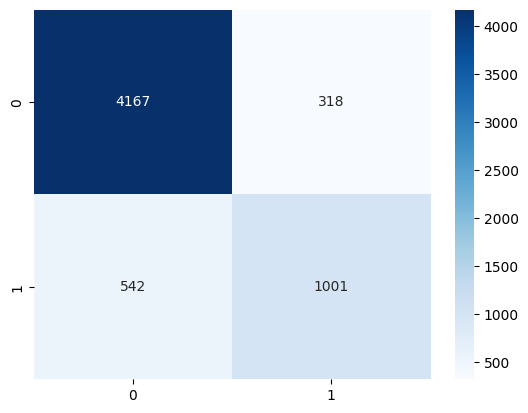

In [43]:
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")

In [44]:
4142+986 # correctly Classifed

5128

In [45]:
361+544 # wrongly classifed

905